<a href="https://colab.research.google.com/github/AnabelBerumen/DataScientist/blob/main/modelos/%C3%81rboles_de_Decisi%C3%B2n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Árboles de decisiòn para especies de flor

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('/content/iris.csv')
data.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [18]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

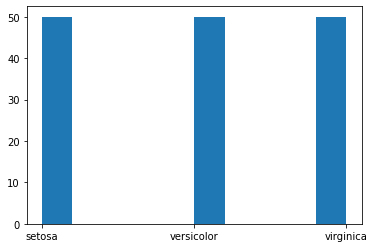

In [19]:
plt.hist(data.Species)

In [20]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [21]:
colnames = data.columns.values.tolist()
predictors = colnames[:-1]
target = colnames[4]

In [22]:
# creamos una columna
data['is_train'] = (np.random.uniform(0,1, len(data))<=0.75).astype(int)

(array([ 31.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 119.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

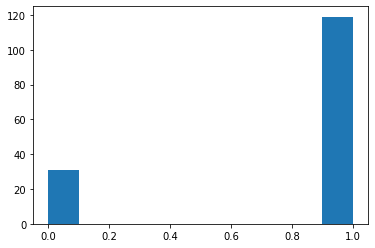

In [23]:
plt.hist(data.is_train)

In [24]:
train, test = data[data['is_train']==True], data[data['is_train']==False]

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
from numpy.random.mtrand import random
tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [27]:
preds = tree.predict(test[predictors])

In [28]:
pd.crosstab(test[target], preds, rownames=['Actual'], colnames=['Predictions'])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,11,0,0
versicolor,0,9,2
virginica,0,0,9


Visualizar 

In [29]:
from sklearn.tree import export_graphviz

In [30]:
with open('resources/iris_dtree.dot', 'w') as dotfile:
  export_graphviz(tree, out_file=dotfile, feature_names=predictors)
  dotfile.close()

In [31]:
import os
from graphviz import Source

In [32]:
file = open('resources/iris_dtree.dot')
text = file.read()
text

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.585\\nsamples = 119\\nvalue = [39, 39, 41]"] ;\n1 [label="entropy = 0.0\\nsamples = 39\\nvalue = [39, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.65\\nentropy = 1.0\\nsamples = 80\\nvalue = [0, 39, 41]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 4.95\\nentropy = 0.371\\nsamples = 42\\nvalue = [0, 39, 3]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 38\\nvalue = [0, 38, 0]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.811\\nsamples = 4\\nvalue = [0, 1, 3]"] ;\n3 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 38\\nvalue = [0, 0, 38]"] ;\n2 -> 6 ;\n}'

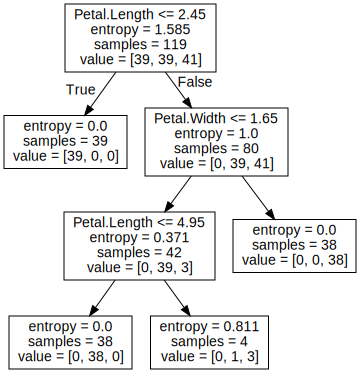

In [33]:
Source(text)

Cross Validation

In [34]:
X = data[predictors]
Y = data[target]

In [35]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                              random_state=99)
tree.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [36]:
from sklearn.model_selection import KFold

In [37]:
cv = KFold(n_splits= 10, shuffle=True, random_state=1)

In [38]:
from sklearn.model_selection import cross_val_score
score = np.mean(cross_val_score(tree, X, Y, scoring='accuracy', cv=cv, n_jobs=1))
score

0.9333333333333333

In [39]:
for i in range(1, 11):
  tree = DecisionTreeClassifier(criterion='entropy', max_depth=i, min_samples_split=20,
                              random_state=99)
  tree.fit(X, Y)
  cv = KFold(n_splits= 10, shuffle=True, random_state=1)
  score = cross_val_score(tree, X, Y, scoring='accuracy', cv=cv, n_jobs=1)
  score = np.mean(score)
  print('Score para i = ', i, 'es de ', score)

Score para i =  1 es de  0.5666666666666667
Score para i =  2 es de  0.9200000000000002
Score para i =  3 es de  0.9400000000000001
Score para i =  4 es de  0.9333333333333333
Score para i =  5 es de  0.9333333333333333
Score para i =  6 es de  0.9333333333333333
Score para i =  7 es de  0.9333333333333333
Score para i =  8 es de  0.9333333333333333
Score para i =  9 es de  0.9333333333333333
Score para i =  10 es de  0.9333333333333333


Regression Tree

In [40]:
data = pd.read_csv('/content/Boston.csv')
data.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [41]:
colnames = data.columns.values.tolist()
predictors = colnames[0:13]
target = colnames[13]
X = data[predictors]
Y = data[target]

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, random_state=0)
regtree.fit(X, Y)

DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=30, random_state=0)

In [44]:
preds = regtree.predict(data[predictors])
data['preds'] = preds

In [45]:
data[['preds', 'medv']]

,preds,medv
0,22.840000,24.0
1,22.840000,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
...,...,...
501,22.840000,22.4
502,20.624138,20.6
503,28.978261,23.9
504,31.170000,22.0


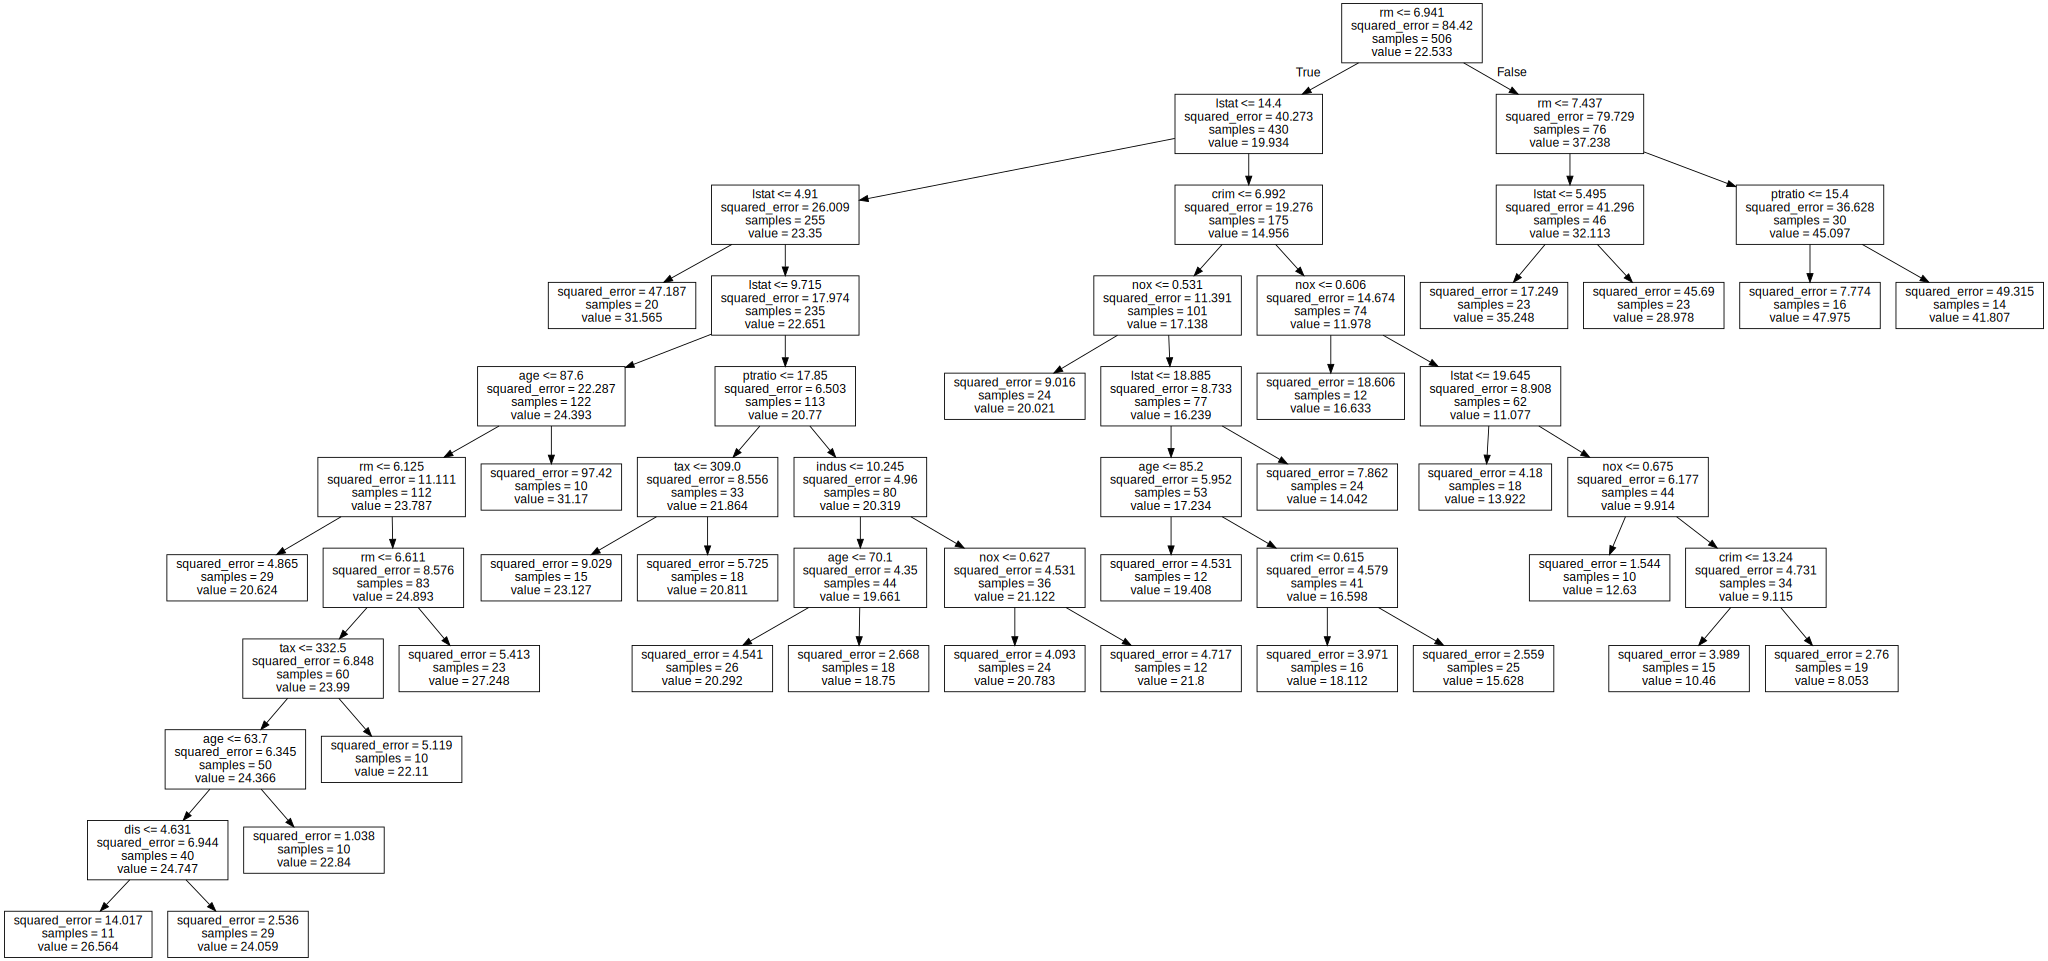

In [46]:
from sklearn.tree import export_graphviz
with open('resources/boston_rtree.dot', 'w') as dotfile:
  export_graphviz(regtree, out_file=dotfile, feature_names=predictors)
  dotfile.close()

import os
from graphviz import Source
file = open('resources/boston_rtree.dot', 'r')
text = file.read()
Source(text)

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [48]:
cv = cv = KFold(n_splits= 10, shuffle=True, random_state=1)
scores = cross_val_score(regtree, X, Y, scoring='neg_mean_squared_error', cv=cv, n_jobs=1)
print(scores)
score = np.mean(scores)
print(score)

[-13.64925886 -17.28987161 -16.98569707 -47.56954086  -9.26202865
 -17.23057023 -15.41541493 -31.33011027 -22.79877067  -9.54180723]
-20.107307036443846


In [49]:
list(zip(predictors, regtree.feature_importances_))

[('crim', 0.03421203230639308),
 ('zn', 0.0),
 ('indus', 0.0011605887788380146),
 ('chas', 0.0),
 ('nox', 0.01856163073811432),
 ('rm', 0.6308568014337028),
 ('age', 0.01725115143448847),
 ('dis', 0.0013745115995791378),
 ('rad', 0.0),
 ('tax', 0.0023698305298803803),
 ('ptratio', 0.009333247332530954),
 ('black', 0.0),
 ('lstat', 0.28488020584647283)]

Random forest

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
forest = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=10)
forest.fit(X, Y)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, n_jobs=2, oob_score=True)

In [52]:
data['rforest_pred'] = forest.oob_prediction_
data[['rforest_pred', 'medv']]

,rforest_pred,medv
0,35.100000,24.0
1,23.433333,21.6
2,31.800000,34.7
3,33.950000,33.4
4,33.075000,36.2
...,...,...
501,28.700000,22.4
502,13.050000,20.6
503,23.600000,23.9
504,26.333333,22.0


In [53]:
data['rforest_error2'] = (data['rforest_pred'] - data['medv']) ** 2
sum(data['rforest_error2'] / len(data))

27.864407472826116

In [54]:
forest.oob_score_

0.6699294720138016